# Analyse multiple experiments at multple confidence thresholds


### **Recall** in this context is also the *True positive rate* or *Sensitivity*, 
----> This is quantitative measure. One interpretion: How likely is that most of the relevant results are returned (even if there are irrelevant predictions). Higher the recall, more turtles are detected (even if there are more incorrect predictions of things that are not turtles). 

In worst case scenario, nothing is detected as a turtle.  Recall is zero
In best case scenario, all turtles are detected, and no mistakes are made. Recall is 1.

### **Precision** is also the *Positive predictive value* (PPV); 
 ----> This is qualitative measure. One interpretion: How likely is that the model predictions are relevant. Higher the precision, more the likelihood that the results are relevant. In other words, Higher precision would mean, most of the predictions of Turtles, are actually turtles. If other things are getting detected as turtles, the precision goes down. 
 
 Worst case scenario: All objects detected as turtles are not turtles, and no turtles were actually detected. Precision becomes zero.
 
 Best case scenario: All turtles that are detected are actully turtles and no object was mistakenly detected as a turtle. Precision is 1
 
 #### In best scenario, both precision and recall are 1.  Usually one needs to find a balance bnetween the two.
 
 ### F1-measure combines the two metrics

In [1]:
import pandas as pd
import numpy as np
import glob
import os
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from matplotlib import pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import seaborn as sns
sns.set(rc={'figure.figsize':(11,8)})

In [2]:
#Starting from the location where data is stored
overall_results_dir = os.path.abspath("results/overall_results")
csv_train_dir = os.path.join(overall_results_dir, "train")
csv_val_dir = os.path.join(overall_results_dir, "val")
csv_test_dir = os.path.join(overall_results_dir, "test")

In [3]:
def get_res_summary(csv_dir):
    file_list = sorted(glob.glob(os.path.join(csv_dir, "*.csv")))
    
    results_list = [[0.0,0.0,0.0]]
        
    for res_f in file_list:
        conf_thresh = '0.'+os.path.basename(res_f).split('.')[0].split('_')[-1]
        conf_thresh = np.float64(conf_thresh)

#         print(res_f)
        res_df = pd.read_csv(res_f)
        tp = res_df.sum()[1]
        fn = res_df.sum()[2]
        fp = res_df.sum()[3]
#         print(tp, fn, fp)
        if tp:
            precision = tp/(tp+fp)
            recall = tp/(tp+fn)
#             F1 = 2 * (precision * recall) / (precision + recall)
        else:
            precision = 0.0
            recall = 0.0
#             F1 = 0.0
 
        results_list += [[conf_thresh, precision, recall]]

#         print(conf_thresh, precision, recall)
        
    return(results_list)

# Val set results

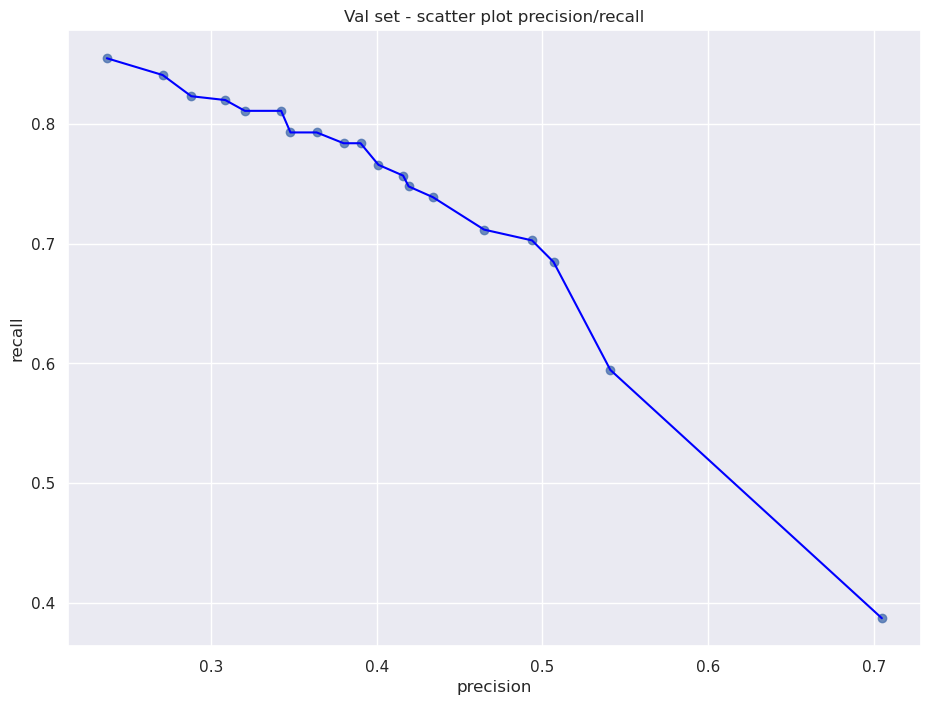

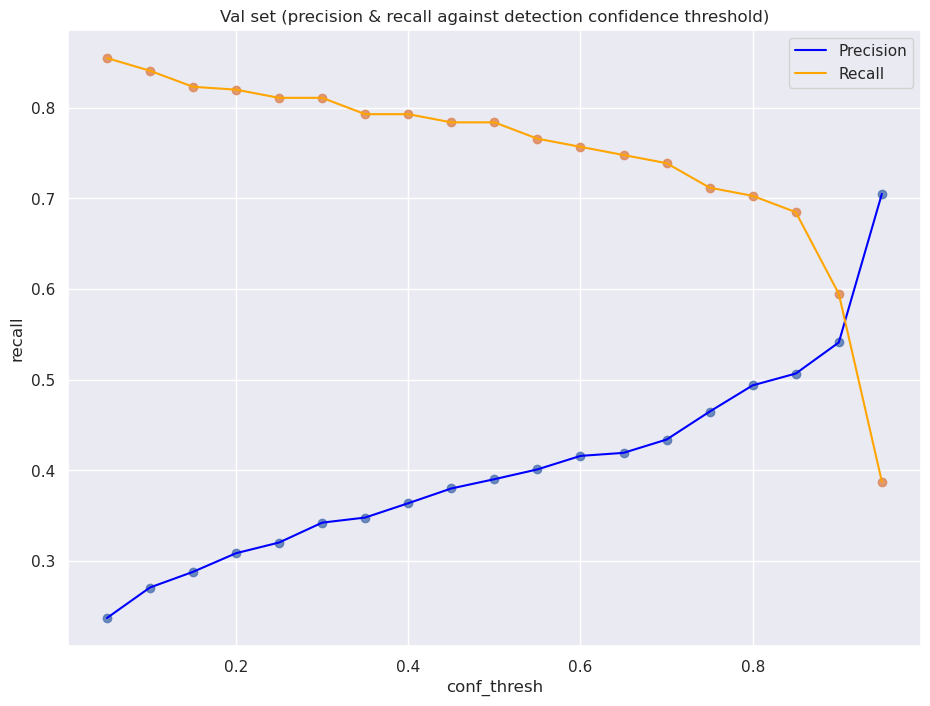

In [4]:
results_summary = np.array(get_res_summary(csv_val_dir))
df = pd.DataFrame(results_summary[2:], columns=["conf_thresh", "precision", "recall"])

# sns.scatterplot(df['precision'], df['recall'], c=df['val']).plot()
ax = sns.regplot(x=df["precision"], y=df["recall"], fit_reg=False)
ax.plot(df["precision"], df['recall'], color="blue", label="Val set", linestyle="-")

ax.set_title('Val set - scatter plot precision/recall')
plt.show()


f, ax = plt.subplots(1, 1)

ax = sns.regplot(y=df["precision"], x=df["conf_thresh"], fit_reg=False)
ax = sns.regplot(y=df["recall"], x=df["conf_thresh"], fit_reg=False)

ax.plot(df["conf_thresh"], df['precision'], color="blue", label="Precision", linestyle="-")
ax.plot(df["conf_thresh"], df['recall'], color="orange", label="Recall", linestyle="-")
# ax.set_ylabel("_")
ax.set_title('Val set (precision & recall against detection confidence threshold)')

ax.legend()

# ax.set_xticks(range[0,1,0.05])
# ax.plot(df2.date, df2["count"], color="red", label="B", linestyle="-")

plt.show()


In [5]:
df_val = df
df_val.to_csv(path_or_buf="Val_set_results.csv", index=False)

# Test set results

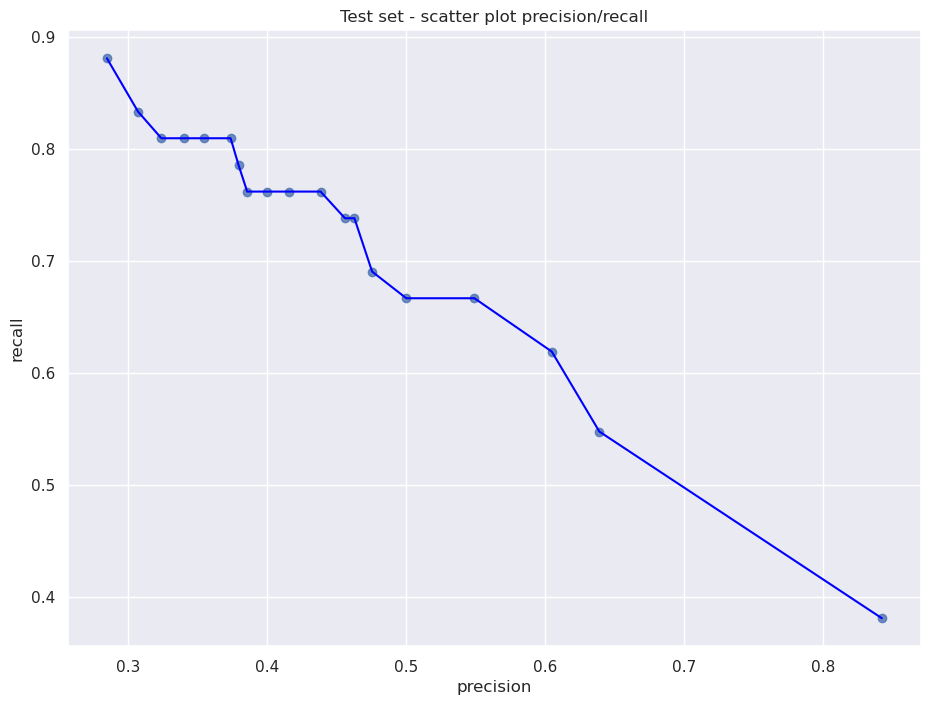

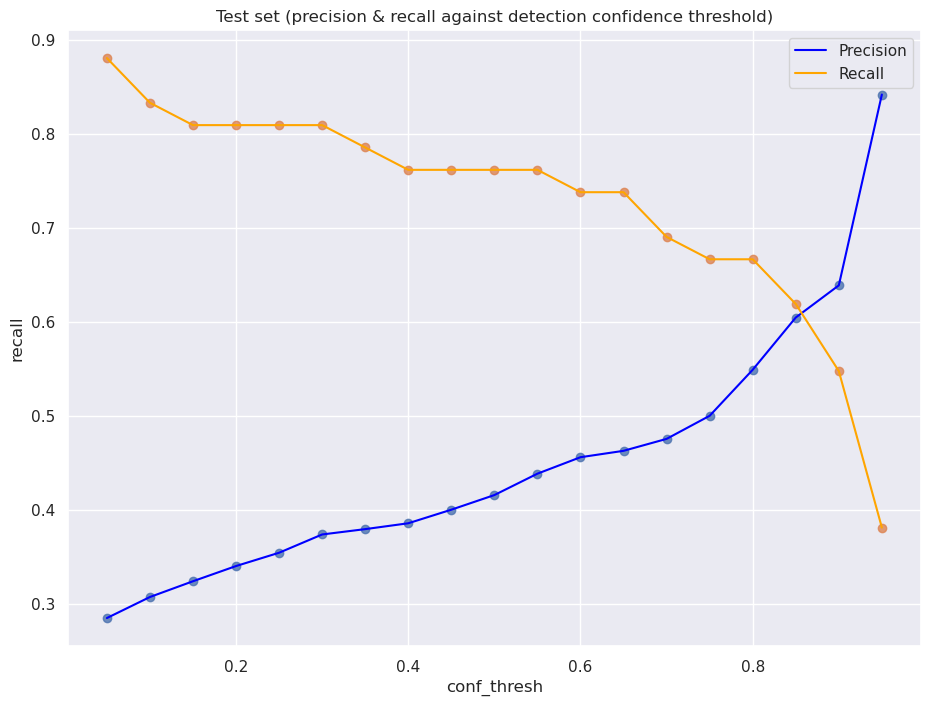

In [6]:
results_summary = np.array(get_res_summary(csv_test_dir))
df = pd.DataFrame(results_summary[2:], columns=["conf_thresh", "precision", "recall"])

# sns.scatterplot(df['precision'], df['recall'], c=df['val']).plot()
ax = sns.regplot(x=df["precision"], y=df["recall"], fit_reg=False)
ax.plot(df["precision"], df['recall'], color="blue", label="Test set", linestyle="-")

ax.set_title('Test set - scatter plot precision/recall')
plt.show()


f, ax = plt.subplots(1, 1)

ax = sns.regplot(y=df["precision"], x=df["conf_thresh"], fit_reg=False)
ax = sns.regplot(y=df["recall"], x=df["conf_thresh"], fit_reg=False)

ax.plot(df["conf_thresh"], df['precision'], color="blue", label="Precision", linestyle="-")
ax.plot(df["conf_thresh"], df['recall'], color="orange", label="Recall", linestyle="-")
# ax.set_ylabel("_")
ax.set_title('Test set (precision & recall against detection confidence threshold)')

ax.legend()

# ax.set_xticks(range[0,1,0.05])
# ax.plot(df2.date, df2["count"], color="red", label="B", linestyle="-")

plt.show()


In [7]:
df_test = df
df_test.to_csv(path_or_buf="Test_set_results.csv", index=False)


## Full comparison of mutiple results summaries

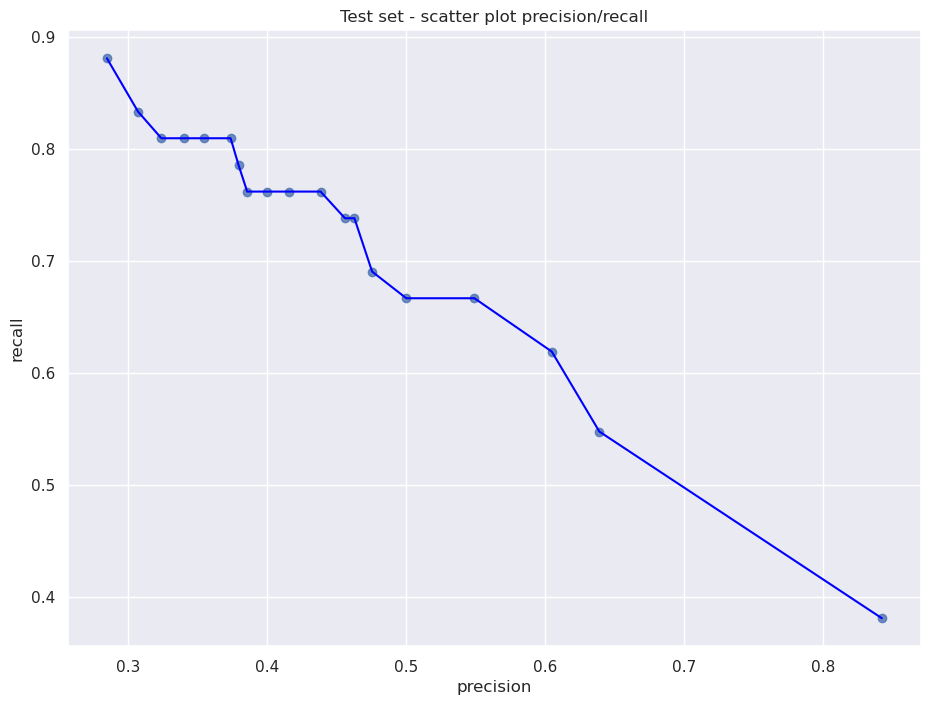

In [8]:
results_summary = np.array(get_res_summary(csv_test_dir))
df = pd.DataFrame(results_summary[2:], columns=["conf_thresh", "precision", "recall"])

# sns.scatterplot(df['precision'], df['recall'], c=df['val']).plot()
ax = sns.regplot(x=df["precision"], y=df["recall"], fit_reg=False)
ax.plot(df["precision"], df['recall'], color="blue", label="Test set", linestyle="-")

ax.set_title('Test set - scatter plot precision/recall')
plt.show()

In [9]:
#Pre 72 new examples

csv_val_pre72_dir = "/home/user/sandbox/turtles/detr_base/detr_pre-_rebecca_cleaning/results/overall_results/val/"
csv_test_pre72_dir = "/home/user/sandbox/turtles/detr_base/detr_pre-_rebecca_cleaning/results/overall_results/test/"


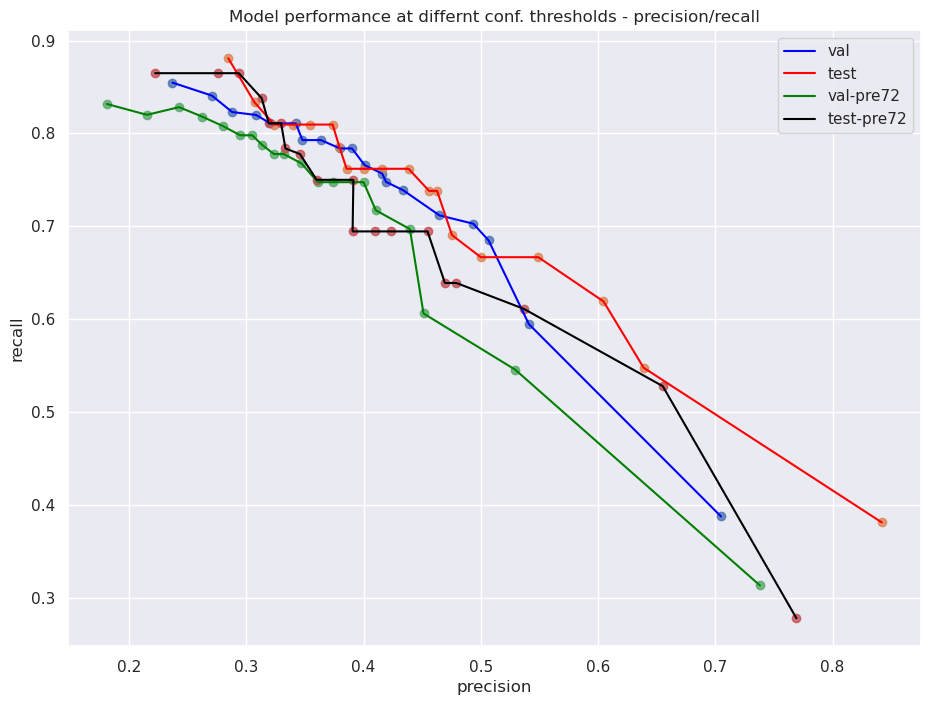

In [10]:
colors = ['blue', 'red', 'green', 'black']
labels = ['val', 'test', 'val-pre72', 'test-pre72']
results_dirs = [csv_val_dir, csv_test_dir, csv_val_pre72_dir, csv_test_pre72_dir]
# results_dirs = [csv_val_pre72_dir, csv_test_pre72_dir]

for csv_dir, l, c in zip(results_dirs, labels, colors):
#     print(l)
    results_summary = np.array(get_res_summary(csv_dir))
#     print(results_summary)
    df = pd.DataFrame(results_summary[2:], columns=["conf_thresh", "precision", "recall"])

    ax = sns.regplot(x=df["precision"], y=df["recall"], fit_reg=False)
    ax.plot(df["precision"], df['recall'], color=c, label=l, linestyle="-")

h,l = ax.get_legend_handles_labels()
ax.legend(handles=h, labels=labels)

ax.set_title('Model performance at differnt conf. thresholds - precision/recall')
plt.show()
